In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.svm import SVC
%matplotlib inline

In [2]:
df=pd.read_csv("Dataset of Diabetes .csv")
df=df.drop('ID', axis=1)
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,M,58,20.8,800,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
1,M,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
2,M,60,2.1,56,7.6,3.3,1.7,0.9,1.7,0.8,36.6,Y
3,M,60,2.1,56,7.2,6.3,3.7,1.0,3.7,1.7,28.0,Y
4,F,56,4.0,45,9.2,4.1,0.6,1.3,1.4,0.9,30.0,Y


In [3]:
df.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [4]:
unique_values = df['Gender'].unique()

# In ra các giá trị duy nhất của cột
print("Các giá trị duy nhất của cột:")
for value in unique_values:
    print(value)

Các giá trị duy nhất của cột:
M
F
f


In [5]:
unique_values_1 = df['CLASS'].unique()

# In ra các giá trị duy nhất của cột
print("Các giá trị duy nhất của cột:")
for value in unique_values_1:
    print(value)

Các giá trị duy nhất của cột:
Y
P
N
Y 
N 


In [6]:
df['CLASS'].values

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'P', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'P', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'P', 'Y', 'Y', 'Y', 'Y', 'Y', 'P', 'Y', 'P',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'P', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'P', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'P', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'P', 'Y', 'Y', 'Y', 'P', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'P',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y

In [7]:
df["CLASS"].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [8]:
df['Gender'] = df['Gender'].replace({'M': 1, 'F': 2,'f':2})
df['CLASS'] = df['CLASS'].replace({'Y': 1, 'N': 0})
df.head(100)


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,58,20.8,800,9.1,6.6,2.9,1.1,4.3,1.3,33.0,1
1,1,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,1
2,1,60,2.1,56,7.6,3.3,1.7,0.9,1.7,0.8,36.6,1
3,1,60,2.1,56,7.2,6.3,3.7,1.0,3.7,1.7,28.0,1
4,2,56,4.0,45,9.2,4.1,0.6,1.3,1.4,0.9,30.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,60,4.8,44,8.0,3.5,1.8,1.4,1.4,0.8,27.0,1
96,1,54,6.3,87,8.2,2.3,0.7,0.8,1.2,0.3,34.0,1
97,1,54,2.8,43,6.9,6.7,2.4,1.1,4.6,1.1,30.0,1
98,1,53,14.9,327,11.0,5.9,8.7,1.0,3.0,3.4,33.0,1


In [9]:


# Tìm chỉ mục của các hàng có giá trị "P" trong cột "CLASS"
index_to_drop = df[df['CLASS'] == 'P'].index

# Xóa các hàng có chỉ mục tương ứng
df = df.drop(index_to_drop)
df=df.dropna()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  947 non-null    int64  
 1   AGE     947 non-null    int64  
 2   Urea    947 non-null    float64
 3   Cr      947 non-null    int64  
 4   HbA1c   947 non-null    float64
 5   Chol    947 non-null    float64
 6   TG      947 non-null    float64
 7   HDL     947 non-null    float64
 8   LDL     947 non-null    float64
 9   VLDL    947 non-null    float64
 10  BMI     947 non-null    float64
 11  CLASS   947 non-null    object 
dtypes: float64(8), int64(3), object(1)
memory usage: 96.2+ KB


Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64

In [10]:
df.dtypes


Gender      int64
AGE         int64
Urea      float64
Cr          int64
HbA1c     float64
Chol      float64
TG        float64
HDL       float64
LDL       float64
VLDL      float64
BMI       float64
CLASS      object
dtype: object

In [11]:
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce').astype('Float64')

# Chuyển đổi cột 'CLASS' sang kiểu dữ liệu số nguyên
df['CLASS'] = pd.to_numeric(df['CLASS'], errors='coerce').astype('Float64')

# Kiểm tra kết quả
print(df.dtypes)


Gender    Float64
AGE         int64
Urea      float64
Cr          int64
HbA1c     float64
Chol      float64
TG        float64
HDL       float64
LDL       float64
VLDL      float64
BMI       float64
CLASS     Float64
dtype: object


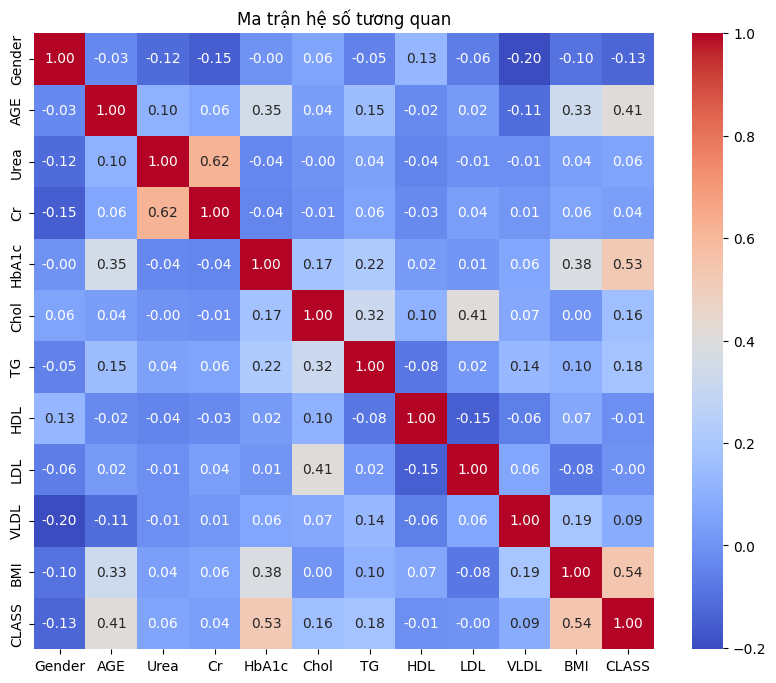

In [12]:
corr_matrix = df.corr()

# Vẽ heatmap cho ma trận hệ số tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận hệ số tương quan')
plt.show()

In [13]:
y=df['CLASS']
X=df.drop(['CLASS'],axis=1)
cols = X.columns
index = X.index
df=df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  942 non-null    Float64
 1   AGE     942 non-null    int64  
 2   Urea    942 non-null    float64
 3   Cr      942 non-null    int64  
 4   HbA1c   942 non-null    float64
 5   Chol    942 non-null    float64
 6   TG      942 non-null    float64
 7   HDL     942 non-null    float64
 8   LDL     942 non-null    float64
 9   VLDL    942 non-null    float64
 10  BMI     942 non-null    float64
 11  CLASS   942 non-null    Float64
dtypes: Float64(2), float64(8), int64(2)
memory usage: 97.5 KB


Lượng thông tin được giữ lại của mỗi thành phần: [0.17940421 0.15140605]
Tổng lượng thông tin được giữ lại: 0.33081026148310955
Độ chính xác mô hình khi sử dụng PCA: 0.9788359788359788


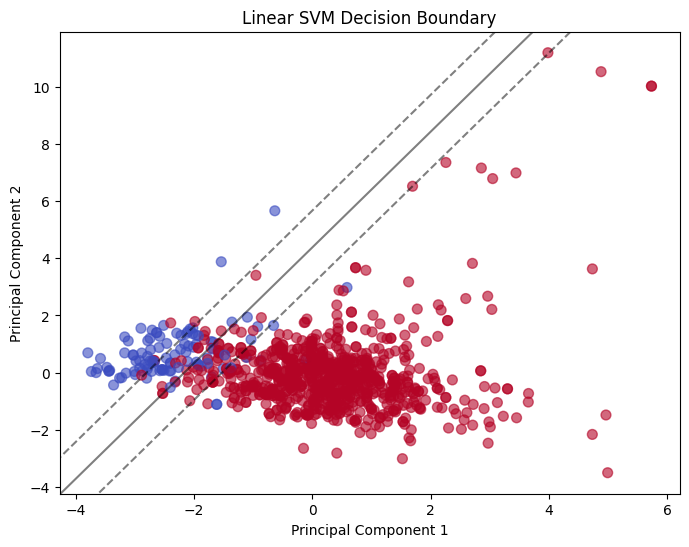

Intercept [3.39914827]
Coef [[ 1.56924542 -0.77513326]]


In [14]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt


sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df.drop(["CLASS"], axis=1)))
y = df["CLASS"]
# Áp dụng PCA để giảm chiều dữ liệu xuống 2 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
print("Lượng thông tin được giữ lại của mỗi thành phần:", explained_variance_ratio)
print("Tổng lượng thông tin được giữ lại:", sum(explained_variance_ratio))
#Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình SVM với hàm tuyến tính
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Đánh giá mô hình
accuracy = svm.score(X_test, y_test)
print("Độ chính xác mô hình khi sử dụng PCA:", accuracy)

# Trực quan hóa đường phân chia tuyến tính trên đồ thị
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=50, alpha=0.6)
# Vẽ đường phân chia tuyến tính
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Linear SVM Decision Boundary')
plt.savefig("Mophong_SVM_khi_su_dungPCA.png")
plt.show()
intercept = svm.intercept_
coefficients = svm.coef_
print('Intercept',intercept)
print('Coef',coefficients)

In [15]:

scaler = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df.drop(["CLASS"], axis=1)))
y = df["CLASS"]
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)
model = SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_train = accuracy_score(y_train,model.predict(X_train))
accuracy_test = accuracy_score(y_test,model.predict(X_test))
print("Độ chính xác mô hình đối với tập train là:",accuracy_train)
print("Độ chính xác mô hình đối với tập test là:",accuracy_test)

Độ chính xác mô hình đối với tập train là: 0.9853917662682603
Độ chính xác mô hình đối với tập test là: 0.9417989417989417


In [16]:
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93        80
         1.0       1.00      0.99      0.99       673

    accuracy                           0.99       753
   macro avg       0.95      0.98      0.96       753
weighted avg       0.99      0.99      0.99       753

              precision    recall  f1-score   support

         0.0       0.72      0.82      0.77        22
         1.0       0.98      0.96      0.97       167

    accuracy                           0.94       189
   macro avg       0.85      0.89      0.87       189
weighted avg       0.95      0.94      0.94       189



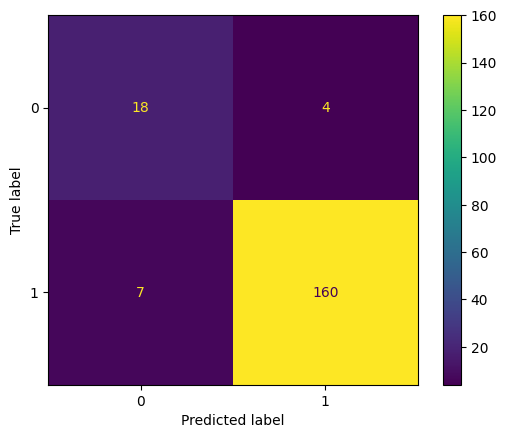

In [17]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, model.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.savefig("Ma trận nhầm lẫn")
plt.show()


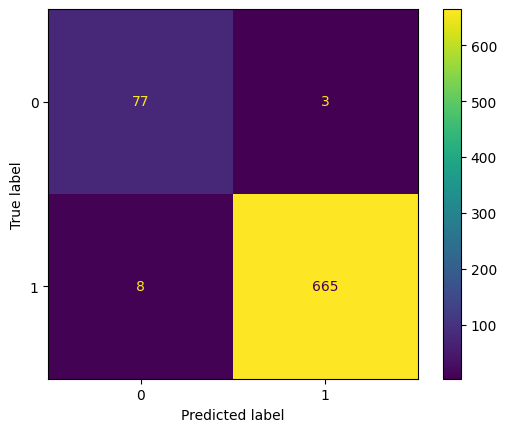

In [18]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_train, model.predict(X_train))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.savefig("Ma trận nhầm lẫn_1")
plt.show()


In [19]:
C_values = [0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000]
for C in C_values:
    # Khởi tạo mô hình SVM với kernel tuyến tính và tham số C
    model_soft_margin = SVC(kernel='linear',C=C)

    # Huấn luyện mô hình
    model_soft_margin.fit(X_train,y_train)

    # Dự đoán trên tập huấn luyện và tập kiểm tra
    y_pred_train = model_soft_margin.predict(X_train)
    y_pred_test = model_soft_margin.predict(X_test)

    # Tính độ chính xác trên tập huấn luyện và tập kiểm tra
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # In ra độ chính xác tương ứng với từng giá trị C
    print(f"C = {C}: Train Accuracy = {train_accuracy}, Test Accuracy = {test_accuracy}")




C = 0.0001: Train Accuracy = 0.8937583001328021, Test Accuracy = 0.8835978835978836
C = 0.001: Train Accuracy = 0.8937583001328021, Test Accuracy = 0.8835978835978836
C = 0.01: Train Accuracy = 0.9827357237715804, Test Accuracy = 0.9365079365079365
C = 0.1: Train Accuracy = 0.9787516600265604, Test Accuracy = 0.9312169312169312
C = 1: Train Accuracy = 0.9853917662682603, Test Accuracy = 0.9417989417989417
C = 10: Train Accuracy = 0.9867197875166003, Test Accuracy = 0.9365079365079365
C = 100: Train Accuracy = 0.9867197875166003, Test Accuracy = 0.9365079365079365
C = 1000: Train Accuracy = 0.9867197875166003, Test Accuracy = 0.9365079365079365


C = 0.0001: Train Accuracy = 0.8937583001328021, Test Accuracy = 0.8835978835978836
C = 0.001: Train Accuracy = 0.8937583001328021, Test Accuracy = 0.8835978835978836
C = 0.01: Train Accuracy = 0.9827357237715804, Test Accuracy = 0.9365079365079365
C = 0.1: Train Accuracy = 0.9787516600265604, Test Accuracy = 0.9312169312169312
C = 1: Train Accuracy = 0.9853917662682603, Test Accuracy = 0.9417989417989417
C = 10: Train Accuracy = 0.9867197875166003, Test Accuracy = 0.9365079365079365
C = 100: Train Accuracy = 0.9867197875166003, Test Accuracy = 0.9365079365079365
C = 1000: Train Accuracy = 0.9867197875166003, Test Accuracy = 0.9365079365079365


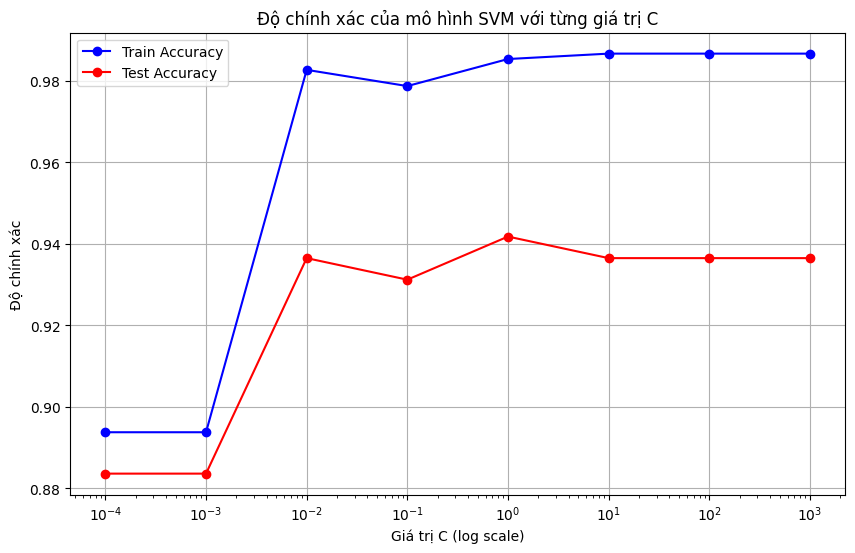

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



# Danh sách để lưu giá trị độ chính xác
train_accuracy_values = []
test_accuracy_values = []

for C in C_values:
    # Khởi tạo mô hình SVM với kernel tuyến tính và tham số C
    model_soft_margin = SVC(kernel='linear', C=C)

    # Huấn luyện mô hình
    model_soft_margin.fit(X_train, y_train)

    # Dự đoán trên tập huấn luyện và tập kiểm tra
    y_pred_train = model_soft_margin.predict(X_train)
    y_pred_test = model_soft_margin.predict(X_test)

    # Tính độ chính xác trên tập huấn luyện và tập kiểm tra
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Lưu giá trị độ chính xác vào danh sách
    train_accuracy_values.append(train_accuracy)
    test_accuracy_values.append(test_accuracy)

    # In ra độ chính xác tương ứng với từng giá trị C
    print(f"C = {C}: Train Accuracy = {train_accuracy}, Test Accuracy = {test_accuracy}")

# Vẽ biểu đồ độ chính xác với từng giá trị C
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracy_values, marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.plot(C_values, test_accuracy_values, marker='o', linestyle='-', color='r', label='Test Accuracy')
plt.xscale('log')  # Chuyển trục x sang thang log
plt.xlabel('Giá trị C (log scale)')
plt.ylabel('Độ chính xác')
plt.title('Độ chính xác của mô hình SVM với từng giá trị C')
plt.legend()
plt.grid(True)
plt.savefig("SVM_train_test_accuracy_vs_C.png")  # Lưu hình ảnh biểu đồ
plt.show()  # Hiển thị đồ thị
